Import all the necessary libraries

In [2]:
import keras
from keras.models import Model
from keras.models import Sequential
from keras.regularizers import l2

In [78]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.optimize
import tensorflow as tf

In [35]:
train_x = np.zeros((13,40960))
i = 0

Import all the training data one by one

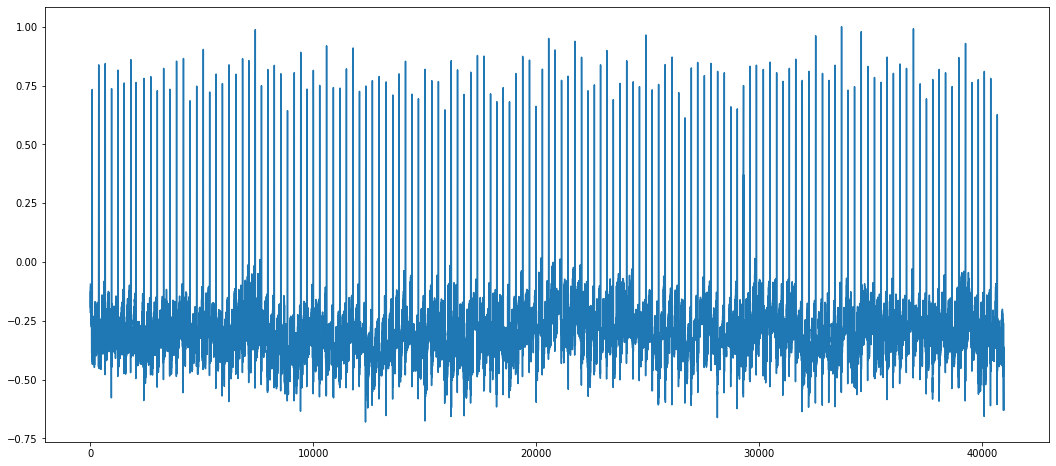

In [60]:
x = pd.read_csv('Train/100aU36.csv')
x = x['# V']
x = np.array(x[:])
x = x/max(abs(min(x)),max(x))
plt.figure(figsize=(18,8))
plt.plot(x)

In [61]:
train_x[i,:] = x
i+=1
train_x[:,0]

array([ 0.12446417,  0.1160299 ,  0.10518316,  0.09165593,  0.07516947,
        0.055622  ,  0.03319754,  0.00841293, -0.01732491, -0.04115306,
       -0.06220718, -0.08017001, -0.09420867])

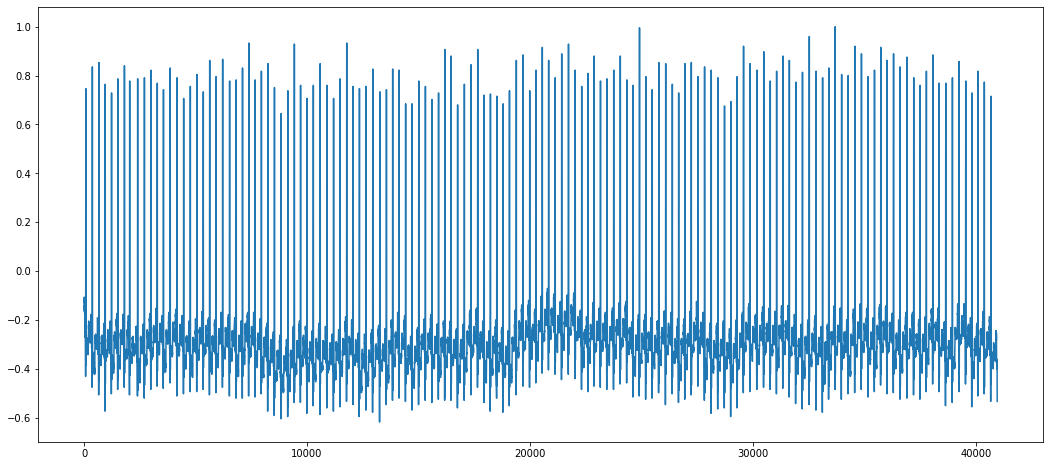

In [62]:
y = pd.read_csv('Train/100aU.csv')
y = y['# V']
y = np.array(y[:])
plt.figure(figsize=(18,8))
#plt.xlim(0,1500)
plt.plot(y)

In [63]:
train_y = np.zeros((13, 40960))

In [64]:
train_y[:14,:] = y
train_y[:,0]

array([-0.12888889, -0.12888889, -0.12888889, -0.12888889, -0.12888889,
       -0.12888889, -0.12888889, -0.12888889, -0.12888889, -0.12888889,
       -0.12888889, -0.12888889, -0.12888889])

In [65]:
train_x = train_x.reshape((130, 4096, 1))
train_y = train_y.reshape((130, 4096, 1))

In [66]:
batch_size = 16
validation_split = 0.2
epochs = 500  #the higher the better (not 100)
input_shape = (4096, 1)

Define the model

In [67]:
#encoder

inputs = tf.keras.layers.Input((4096, 1))

#input_conv
c1 = tf.keras.layers.Conv1D(16, kernel_size=3, kernel_regularizer=l2(0.01), activation='relu', kernel_initializer='he_normal', padding='same')(inputs)

#dense_block1_4layers
l1 = tf.keras.layers.BatchNormalization()(c1)
l1 = tf.keras.layers.Conv1D(32, kernel_size=3, kernel_regularizer=l2(0.01), activation='relu', kernel_initializer='he_normal', padding='same')(l1)
l1 = tf.keras.layers.Dropout(0.2)(l1)
l1_con = tf.keras.layers.concatenate([l1, c1])

l2_ = tf.keras.layers.BatchNormalization()(l1_con)
l2_ = tf.keras.layers.Conv1D(32, kernel_size=3, kernel_regularizer=l2(0.01), activation='relu', kernel_initializer='he_normal', padding='same')(l2_)
l2_ = tf.keras.layers.Dropout(0.2)(l2_)
l2_con = tf.keras.layers.concatenate([l2_, l1_con])

l3 = tf.keras.layers.BatchNormalization()(l2_con)
l3 = tf.keras.layers.Conv1D(32, kernel_size=3, kernel_regularizer=l2(0.01), activation='relu', kernel_initializer='he_normal', padding='same')(l3)
l3 = tf.keras.layers.Dropout(0.2)(l3)
l3_con = tf.keras.layers.concatenate([l3, l2_con])

l4 = tf.keras.layers.BatchNormalization()(l3_con)
l4 = tf.keras.layers.Conv1D(32, kernel_size=3, kernel_regularizer=l2(0.01), activation='relu', kernel_initializer='he_normal', padding='same')(l4)
l4 = tf.keras.layers.Dropout(0.2)(l4)
l4_con = tf.keras.layers.concatenate([l4, l3, l2_, l1])

#concatenation1
concat1 = tf.keras.layers.concatenate([l4_con, c1])

#transition_down1
TD1 = tf.keras.layers.BatchNormalization()(concat1)
TD1 = tf.keras.layers.Conv1D(32, kernel_size=1, kernel_regularizer=l2(0.01), activation='relu', kernel_initializer='he_normal', padding='same')(TD1)
TD1 = tf.keras.layers.Dropout(0.2)(TD1)
TD1 = tf.keras.layers.MaxPooling1D(pool_size=2)(TD1)

#dense_block2_5layers
l1 = tf.keras.layers.BatchNormalization()(TD1)
l1 = tf.keras.layers.Conv1D(64, kernel_size=3, kernel_regularizer=l2(0.01), activation='relu', kernel_initializer='he_normal', padding='same')(l1)
l1 = tf.keras.layers.Dropout(0.2)(l1)
l1_con = tf.keras.layers.concatenate([l1, TD1])

l2_ = tf.keras.layers.BatchNormalization()(l1_con)
l2_ = tf.keras.layers.Conv1D(64, kernel_size=3, kernel_regularizer=l2(0.01), activation='relu', kernel_initializer='he_normal', padding='same')(l2_)
l2_ = tf.keras.layers.Dropout(0.2)(l2_)
l2_con = tf.keras.layers.concatenate([l2_, l1_con])

l3 = tf.keras.layers.BatchNormalization()(l2_con)
l3 = tf.keras.layers.Conv1D(64, kernel_size=3, kernel_regularizer=l2(0.01), activation='relu', kernel_initializer='he_normal', padding='same')(l3)
l3 = tf.keras.layers.Dropout(0.2)(l3)
l3_con = tf.keras.layers.concatenate([l3, l2_con])

l4 = tf.keras.layers.BatchNormalization()(l3_con)
l4 = tf.keras.layers.Conv1D(64, kernel_size=3, kernel_regularizer=l2(0.01), activation='relu', kernel_initializer='he_normal', padding='same')(l4)
l4 = tf.keras.layers.Dropout(0.2)(l4)
l4_con = tf.keras.layers.concatenate([l4, l3_con])

l5 = tf.keras.layers.BatchNormalization()(l4_con)
l5 = tf.keras.layers.Conv1D(64, kernel_size=3, kernel_regularizer=l2(0.01), activation='relu', kernel_initializer='he_normal', padding='same')(l5)
l5 = tf.keras.layers.Dropout(0.2)(l5)
l5_con = tf.keras.layers.concatenate([l5, l4, l3, l2_, l1])

#concatenation2
concat2 = tf.keras.layers.concatenate([l5_con, TD1])

#transition_down2
TD2 = tf.keras.layers.BatchNormalization()(concat2)
TD2 = tf.keras.layers.Conv1D(64, kernel_size=1, kernel_regularizer=l2(0.01), activation='relu', kernel_initializer='he_normal', padding='same')(TD2)
TD2 = tf.keras.layers.Dropout(0.2)(TD2)
TD2 = tf.keras.layers.MaxPooling1D(pool_size=2)(TD2)

#dense_block3_7layers
l1 = tf.keras.layers.BatchNormalization()(TD2)
l1 = tf.keras.layers.Conv1D(128, kernel_size=3, kernel_regularizer=l2(0.01), activation='relu', kernel_initializer='he_normal', padding='same')(l1)
l1 = tf.keras.layers.Dropout(0.2)(l1)
l1_con = tf.keras.layers.concatenate([l1, TD2])

l2_ = tf.keras.layers.BatchNormalization()(l1_con)
l2_ = tf.keras.layers.Conv1D(128, kernel_size=3, kernel_regularizer=l2(0.01), activation='relu', kernel_initializer='he_normal', padding='same')(l2_)
l2_ = tf.keras.layers.Dropout(0.2)(l2_)
l2_con = tf.keras.layers.concatenate([l2_, l1_con])

l3 = tf.keras.layers.BatchNormalization()(l2_con)
l3 = tf.keras.layers.Conv1D(128, kernel_size=3, kernel_regularizer=l2(0.01), activation='relu', kernel_initializer='he_normal', padding='same')(l3)
l3 = tf.keras.layers.Dropout(0.2)(l3)
l3_con = tf.keras.layers.concatenate([l3, l2_con])

l4 = tf.keras.layers.BatchNormalization()(l3_con)
l4 = tf.keras.layers.Conv1D(128, kernel_size=3, kernel_regularizer=l2(0.01), activation='relu', kernel_initializer='he_normal', padding='same')(l4)
l4 = tf.keras.layers.Dropout(0.2)(l4)
l4_con = tf.keras.layers.concatenate([l4, l3_con])

l5 = tf.keras.layers.BatchNormalization()(l4_con)
l5 = tf.keras.layers.Conv1D(128, kernel_size=3, kernel_regularizer=l2(0.01), activation='relu', kernel_initializer='he_normal', padding='same')(l5)
l5 = tf.keras.layers.Dropout(0.2)(l5)
l5_con = tf.keras.layers.concatenate([l5, l4_con])

l6 = tf.keras.layers.BatchNormalization()(l5_con)
l6 = tf.keras.layers.Conv1D(128, kernel_size=3, kernel_regularizer=l2(0.01), activation='relu', kernel_initializer='he_normal', padding='same')(l6)
l6 = tf.keras.layers.Dropout(0.2)(l6)
l6_con = tf.keras.layers.concatenate([l6, l5_con])

l7 = tf.keras.layers.BatchNormalization()(l6_con)
l7 = tf.keras.layers.Conv1D(128, kernel_size=3, kernel_regularizer=l2(0.01), activation='relu', kernel_initializer='he_normal', padding='same')(l7)
l7 = tf.keras.layers.Dropout(0.2)(l7)
l7_con = tf.keras.layers.concatenate([l7, l6, l5, l4, l3, l2_, l1])

#concatenation3
concat3 = tf.keras.layers.concatenate([l7_con, TD2])

#transition_down3
TD3 = tf.keras.layers.BatchNormalization()(concat3)
TD3 = tf.keras.layers.Conv1D(128, kernel_size=1, kernel_regularizer=l2(0.01), activation='relu', kernel_initializer='he_normal', padding='same')(TD3)
TD3 = tf.keras.layers.Dropout(0.2)(TD3)
TD3 = tf.keras.layers.MaxPooling1D(pool_size=2)(TD3)





In [68]:
#code

#bottleneck_10layers_denseblock
l1 = tf.keras.layers.BatchNormalization()(TD3)
l1 = tf.keras.layers.Conv1D(256, kernel_size=3, kernel_regularizer=l2(0.01), activation='relu', kernel_initializer='he_normal', padding='same')(l1)
l1 = tf.keras.layers.Dropout(0.2)(l1)
l1_con = tf.keras.layers.concatenate([l1, TD3])

l2_ = tf.keras.layers.BatchNormalization()(l1_con)
l2_ = tf.keras.layers.Conv1D(256, kernel_size=3, kernel_regularizer=l2(0.01), activation='relu', kernel_initializer='he_normal', padding='same')(l2_)
l2_ = tf.keras.layers.Dropout(0.2)(l2_)
l2_con = tf.keras.layers.concatenate([l2_, l1_con])

l3 = tf.keras.layers.BatchNormalization()(l2_con)
l3 = tf.keras.layers.Conv1D(256, kernel_size=3, kernel_regularizer=l2(0.01), activation='relu', kernel_initializer='he_normal', padding='same')(l3)
l3 = tf.keras.layers.Dropout(0.2)(l3)
l3_con = tf.keras.layers.concatenate([l3, l2_con])

l4 = tf.keras.layers.BatchNormalization()(l3_con)
l4 = tf.keras.layers.Conv1D(256, kernel_size=3, kernel_regularizer=l2(0.01), activation='relu', kernel_initializer='he_normal', padding='same')(l4)
l4 = tf.keras.layers.Dropout(0.2)(l4)
l4_con = tf.keras.layers.concatenate([l4, l3_con])

l5 = tf.keras.layers.BatchNormalization()(l4_con)
l5 = tf.keras.layers.Conv1D(256, kernel_size=3, kernel_regularizer=l2(0.01), activation='relu', kernel_initializer='he_normal', padding='same')(l5)
l5 = tf.keras.layers.Dropout(0.2)(l5)
l5_con = tf.keras.layers.concatenate([l5, l4_con])

l6 = tf.keras.layers.BatchNormalization()(l5_con)
l6 = tf.keras.layers.Conv1D(256, kernel_size=3, kernel_regularizer=l2(0.01), activation='relu', kernel_initializer='he_normal', padding='same')(l6)
l6 = tf.keras.layers.Dropout(0.2)(l6)
l6_con = tf.keras.layers.concatenate([l6, l5_con])

l7 = tf.keras.layers.BatchNormalization()(l6_con)
l7 = tf.keras.layers.Conv1D(256, kernel_size=3, kernel_regularizer=l2(0.01), activation='relu', kernel_initializer='he_normal', padding='same')(l7)
l7 = tf.keras.layers.Dropout(0.2)(l7)
l7_con = tf.keras.layers.concatenate([l7, l6_con])

l8 = tf.keras.layers.BatchNormalization()(l7_con)
l8 = tf.keras.layers.Conv1D(256, kernel_size=3, kernel_regularizer=l2(0.01), activation='relu', kernel_initializer='he_normal', padding='same')(l8)
l8 = tf.keras.layers.Dropout(0.2)(l8)
l8_con = tf.keras.layers.concatenate([l8, l7_con])

l9 = tf.keras.layers.BatchNormalization()(l8_con)
l9 = tf.keras.layers.Conv1D(256, kernel_size=3, kernel_regularizer=l2(0.01), activation='relu', kernel_initializer='he_normal', padding='same')(l9)
l9 = tf.keras.layers.Dropout(0.2)(l9)
l9_con = tf.keras.layers.concatenate([l9, l8_con])

l10 = tf.keras.layers.BatchNormalization()(l9_con)
l10 = tf.keras.layers.Conv1D(256, kernel_size=3, kernel_regularizer=l2(0.01), activation='relu', kernel_initializer='he_normal', padding='same')(l10)
l10 = tf.keras.layers.Dropout(0.2)(l10)
l10_con = tf.keras.layers.concatenate([l10, l9, l8, l7, l6, l5, l4, l3, l2_, l1])





In [69]:
#decoder

#transition_up3
TU3 = tf.keras.layers.Conv1DTranspose(128, kernel_size=3, kernel_regularizer=l2(0.01), strides=2, padding='same')(l10_con)

#concatenation6
concat4 = tf.keras.layers.concatenate([TU3, concat3])

#dense_block3_7layers
l1 = tf.keras.layers.BatchNormalization()(concat4)
l1 = tf.keras.layers.Conv1D(128, kernel_size=3, kernel_regularizer=l2(0.01), activation='relu', kernel_initializer='he_normal', padding='same')(l1)
l1 = tf.keras.layers.Dropout(0.2)(l1)
l1_con = tf.keras.layers.concatenate([l1, concat4])

l2_ = tf.keras.layers.BatchNormalization()(l1_con)
l2_ = tf.keras.layers.Conv1D(128, kernel_size=3, kernel_regularizer=l2(0.01), activation='relu', kernel_initializer='he_normal', padding='same')(l2_)
l2_ = tf.keras.layers.Dropout(0.2)(l2_)
l2_con = tf.keras.layers.concatenate([l2_, l1_con])

l3 = tf.keras.layers.BatchNormalization()(l2_con)
l3 = tf.keras.layers.Conv1D(128, kernel_size=3, kernel_regularizer=l2(0.01), activation='relu', kernel_initializer='he_normal', padding='same')(l3)
l3 = tf.keras.layers.Dropout(0.2)(l3)
l3_con = tf.keras.layers.concatenate([l3, l2_con])

l4 = tf.keras.layers.BatchNormalization()(l3_con)
l4 = tf.keras.layers.Conv1D(128, kernel_size=3, kernel_regularizer=l2(0.01), activation='relu', kernel_initializer='he_normal', padding='same')(l4)
l4 = tf.keras.layers.Dropout(0.2)(l4)
l4_con = tf.keras.layers.concatenate([l4, l3_con])

l5 = tf.keras.layers.BatchNormalization()(l4_con)
l5 = tf.keras.layers.Conv1D(128, kernel_size=3, kernel_regularizer=l2(0.01), activation='relu', kernel_initializer='he_normal', padding='same')(l5)
l5 = tf.keras.layers.Dropout(0.2)(l5)
l5_con = tf.keras.layers.concatenate([l5, l4_con])

l6 = tf.keras.layers.BatchNormalization()(l5_con)
l6 = tf.keras.layers.Conv1D(128, kernel_size=3, kernel_regularizer=l2(0.01), activation='relu', kernel_initializer='he_normal', padding='same')(l6)
l6 = tf.keras.layers.Dropout(0.2)(l6)
l6_con = tf.keras.layers.concatenate([l6, l5_con])

l7 = tf.keras.layers.BatchNormalization()(l6_con)
l7 = tf.keras.layers.Conv1D(128, kernel_size=3, kernel_regularizer=l2(0.01), activation='relu', kernel_initializer='he_normal', padding='same')(l7)
l7 = tf.keras.layers.Dropout(0.2)(l7)
l7_con = tf.keras.layers.concatenate([l7, l6, l5, l4, l3, l2_, l1])

#transition_up2
TU2 = tf.keras.layers.Conv1DTranspose(64, kernel_size=3, kernel_regularizer=l2(0.01), strides=2, padding='same')(l7_con)

#concatenation9
concat5 = tf.keras.layers.concatenate([TU2, concat2])

#dense_block2_5layers
l1 = tf.keras.layers.BatchNormalization()(concat5)
l1 = tf.keras.layers.Conv1D(64, kernel_size=3, kernel_regularizer=l2(0.01), activation='relu', kernel_initializer='he_normal', padding='same')(l1)
l1 = tf.keras.layers.Dropout(0.2)(l1)
l1_con = tf.keras.layers.concatenate([l1, concat5])

l2_ = tf.keras.layers.BatchNormalization()(l1_con)
l2_ = tf.keras.layers.Conv1D(64, kernel_size=3, kernel_regularizer=l2(0.01), activation='relu', kernel_initializer='he_normal', padding='same')(l2_)
l2_ = tf.keras.layers.Dropout(0.2)(l2_)
l2_con = tf.keras.layers.concatenate([l2_, l1_con])

l3 = tf.keras.layers.BatchNormalization()(l2_con)
l3 = tf.keras.layers.Conv1D(64, kernel_size=3, kernel_regularizer=l2(0.01), activation='relu', kernel_initializer='he_normal', padding='same')(l3)
l3 = tf.keras.layers.Dropout(0.2)(l3)
l3_con = tf.keras.layers.concatenate([l3, l2_con])

l4 = tf.keras.layers.BatchNormalization()(l3_con)
l4 = tf.keras.layers.Conv1D(64, kernel_size=3, kernel_regularizer=l2(0.01), activation='relu', kernel_initializer='he_normal', padding='same')(l4)
l4 = tf.keras.layers.Dropout(0.2)(l4)
l4_con = tf.keras.layers.concatenate([l4, l3_con])

l5 = tf.keras.layers.BatchNormalization()(l4_con)
l5 = tf.keras.layers.Conv1D(64, kernel_size=3, kernel_regularizer=l2(0.01), activation='relu', kernel_initializer='he_normal', padding='same')(l5)
l5 = tf.keras.layers.Dropout(0.2)(l5)
l5_con = tf.keras.layers.concatenate([l5, l4, l3, l2_, l1])

#transition_up1
TU1 = tf.keras.layers.Conv1DTranspose(32, kernel_size=3, kernel_regularizer=l2(0.01), strides=2, padding='same')(l5_con)

#concatenation10
concat6 = tf.keras.layers.concatenate([TU1, concat1])

#dense_block1_4layers
l1 = tf.keras.layers.BatchNormalization()(concat6)
l1 = tf.keras.layers.Conv1D(32, kernel_size=3, kernel_regularizer=l2(0.01), activation='relu', kernel_initializer='he_normal', padding='same')(l1)
l1 = tf.keras.layers.Dropout(0.2)(l1)
l1_con = tf.keras.layers.concatenate([l1, concat6])

l2_ = tf.keras.layers.BatchNormalization()(l1_con)
l2_ = tf.keras.layers.Conv1D(32, kernel_size=3, kernel_regularizer=l2(0.01), activation='relu', kernel_initializer='he_normal', padding='same')(l2_)
l2_ = tf.keras.layers.Dropout(0.2)(l2_)
l2_con = tf.keras.layers.concatenate([l2_, l1_con])

l3 = tf.keras.layers.BatchNormalization()(l2_con)
l3 = tf.keras.layers.Conv1D(32, kernel_size=3, kernel_regularizer=l2(0.01), activation='relu', kernel_initializer='he_normal', padding='same')(l3)
l3 = tf.keras.layers.Dropout(0.2)(l3)
l3_con = tf.keras.layers.concatenate([l3, l2_con])

l4 = tf.keras.layers.BatchNormalization()(l3_con)
l4 = tf.keras.layers.Conv1D(32, kernel_size=3, kernel_regularizer=l2(0.01), activation='relu', kernel_initializer='he_normal', padding='same')(l4)
l4 = tf.keras.layers.Dropout(0.2)(l4)
l4_con = tf.keras.layers.concatenate([l4, l3, l2_, l1])

#output_conv
c2 = tf.keras.layers.Conv1D(16, kernel_size=3, kernel_regularizer=l2(0.01), activation='relu', kernel_initializer='he_normal', padding='same')(l4_con)

outputs = tf.keras.layers.Conv1D(1, kernel_size=1, activation='tanh')(c2)

model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()







Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 4096, 1)]    0                                            
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 4096, 16)     64          input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 4096, 16)     64          conv1d[0][0]                     
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 4096, 32)     1568        batch_normalization[0][0]        
______________________________________________________________________________________________

Initiate Training

In [70]:
results = model.fit(train_x, train_y, validation_split=validation_split, batch_size=batch_size, epochs=epochs)

Epoch 1/100
7/7 [==============================] - 63s 2s/step - loss: 104.9657 - val_loss: 76.3498
Epoch 2/100
7/7 [==============================] - 6s 889ms/step - loss: 69.8467 - val_loss: 51.2111
Epoch 3/100
7/7 [==============================] - 6s 894ms/step - loss: 47.0993 - val_loss: 35.3915
Epoch 4/100
7/7 [==============================] - 6s 900ms/step - loss: 32.7470 - val_loss: 25.3615
Epoch 5/100
7/7 [==============================] - 6s 904ms/step - loss: 23.6450 - val_loss: 18.8649
Epoch 6/100
7/7 [==============================] - 6s 909ms/step - loss: 17.7088 - val_loss: 14.4952
Epoch 7/100
7/7 [==============================] - 6s 911ms/step - loss: 13.6874 - val_loss: 11.4453
Epoch 8/100
7/7 [==============================] - 6s 916ms/step - loss: 10.8554 - val_loss: 9.2346
Epoch 9/100
7/7 [==============================] - 6s 922ms/step - loss: 8.7922 - val_loss: 7.5844
Epoch 10/100
7/7 [==============================] - 6s 925ms/step - loss: 7.2413 - val_loss: 6.

Plot the error curves

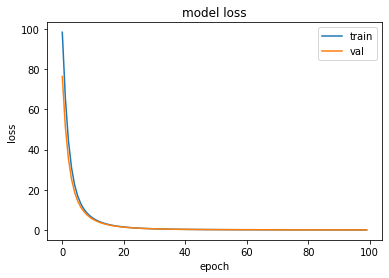

In [71]:
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [ ]:
model.save('Tiramisu.h5')

In [93]:
model = tf.keras.models.load_model('Tiramisu.h5')

Import unseen signals to make prediction on them

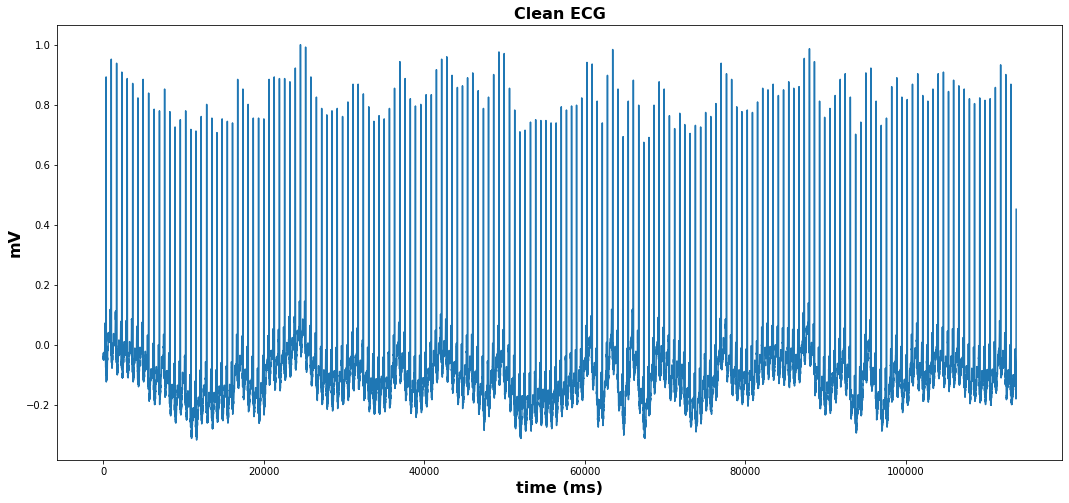

In [94]:
actual_signal = pd.read_csv('234/234_full_409600samples.csv')
actual_signal = actual_signal['# V'][0*40960:1*40960]
actual_signal = actual_signal
actual_signal = np.array(actual_signal[:])
actual_signal = actual_signal/max(abs(min(actual_signal)),max(actual_signal))
time = np.arange(0, 113777.778, 0002.777777778)
plt.figure(figsize=(18,8))
plt.xlabel('time (ms)', fontsize=16, fontweight='bold')
plt.ylabel('mV', fontsize=16, fontweight='bold')
plt.title("Clean ECG", fontsize=16, fontweight='bold') 
plt.plot(time[:len(time)-1], actual_signal)



detect the peaks of the ground clean ECG

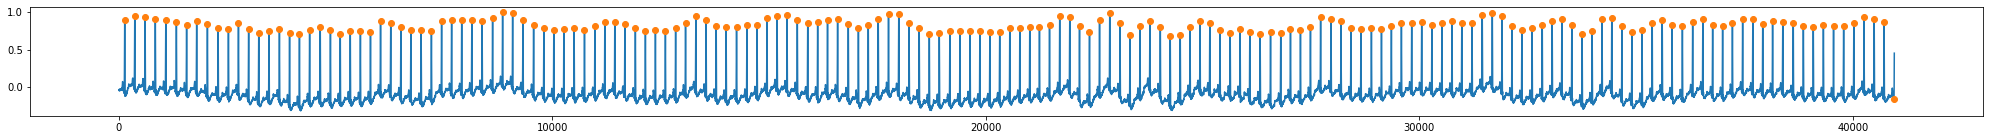

(176,)

In [95]:
from scipy.signal import find_peaks

actual_ECG = actual_signal

peaks, _ = find_peaks(actual_ECG, distance=220)
plt.figure(figsize=(35,2))
#plt.xlim(8000,12000)
plt.plot(actual_ECG)
plt.plot(peaks, actual_ECG[peaks], "o")
plt.show()
peaks.shape

Calculate the true IBIs

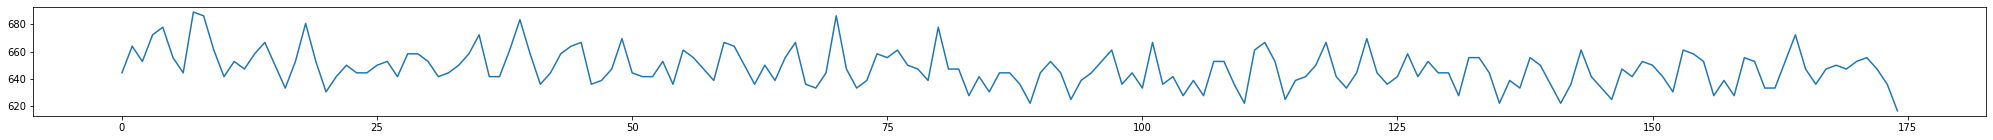

In [96]:
time = np.arange(0, 113777.778, 0002.777777778)
time_at_peak = time[peaks]
IBI = np.zeros(len(time_at_peak)-1)

for i in range(1, len(time_at_peak)):
  IBI[i-1] = time_at_peak[i] - time_at_peak[i-1]


plt.figure(figsize=(35,2))
plt.plot(IBI[:len(IBI)])


Import the noisy signal

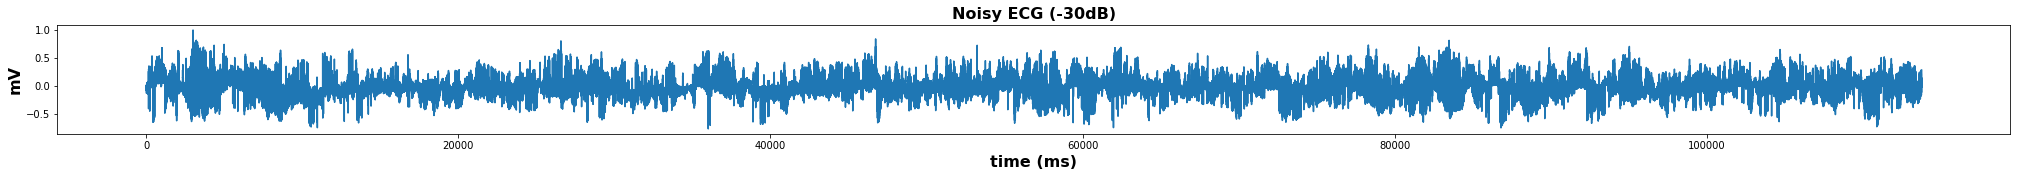

In [105]:
noisy_signal = pd.read_csv('234_full_409600_-24.csv')
noisy_signal = noisy_signal['# V'][0*40960:1*40960]
noisy_signal = np.array(noisy_signal[:])
noisy_signal = noisy_signal/max(abs(min(noisy_signal)),max(noisy_signal))
plt.figure(figsize=(35,2))
plt.xlabel('time (ms)', fontsize=16, fontweight='bold')
plt.ylabel('mV', fontsize=16, fontweight='bold')
plt.title("Noisy ECG (-30dB)", fontsize=16, fontweight='bold')
plt.plot(time[:len(time)-1],noisy_signal)

Make Prediction

In [106]:
noisy_signal = noisy_signal.reshape(10, 4096, 1)

In [107]:
prediction = model.predict(noisy_signal, verbose=0)
prediction = prediction.reshape((40960, 1))

<function matplotlib.pyplot.show>

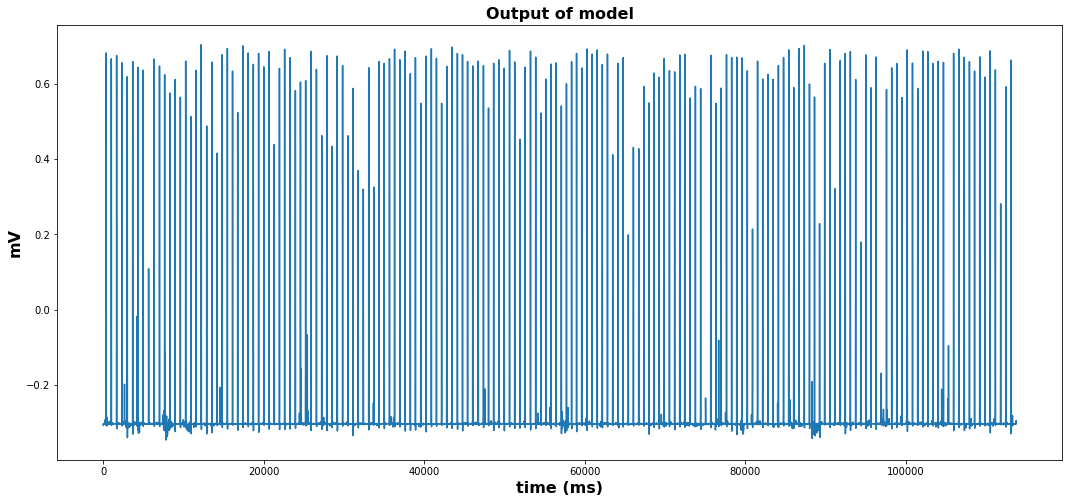

In [108]:
plt.figure(figsize=(18,8))
plt.plot(time[:len(time)-1],prediction)
plt.xlabel('time (ms)', fontsize=16,fontweight='bold')
plt.ylabel('mV', fontsize=16, fontweight='bold')
plt.title("Output of model", fontsize=16, fontweight='bold')
plt.show

In [109]:
b = np.ones((1,))
prediction = np.dot(prediction,b)

Detect the peaks from the predicted sequence

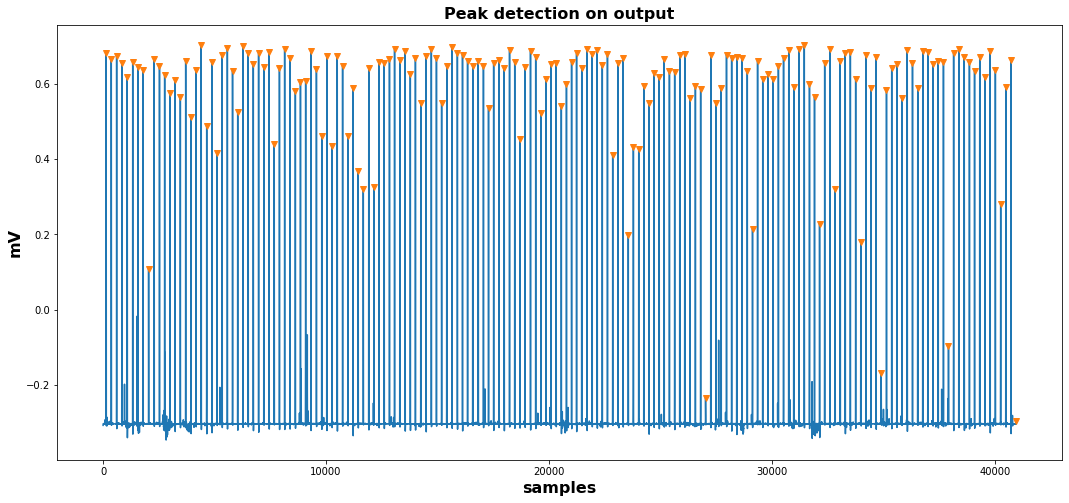

(176,)

In [110]:
peaks, _ = find_peaks(prediction, distance=188)
plt.figure(figsize=(18,8))
plt.plot(prediction)
plt.plot(peaks, prediction[peaks], "v")
plt.xlabel('samples', fontsize=16, fontweight='bold')
plt.ylabel('mV', fontsize=16,fontweight='bold')
plt.title("Peak detection on output", fontsize=16, fontweight='bold')
plt.show()
peaks.shape

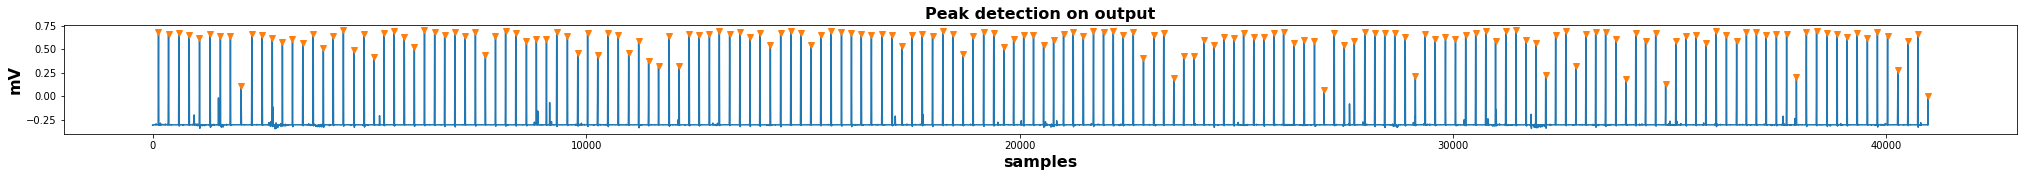

In [111]:
for i in range(0, len(peaks)):
  if (prediction[peaks[i]] < 0):
    prediction[peaks[i]] = prediction[peaks[i]] + 0.3
plt.figure(figsize=(35,2))
plt.plot(prediction)
plt.plot(peaks, prediction[peaks], "v")
plt.xlabel('samples', fontsize=16, fontweight='bold')
plt.ylabel('mV', fontsize=16,fontweight='bold')
plt.title("Peak detection on output", fontsize=16, fontweight='bold')
plt.show()

Estimate IBIs and compare with true IBIs

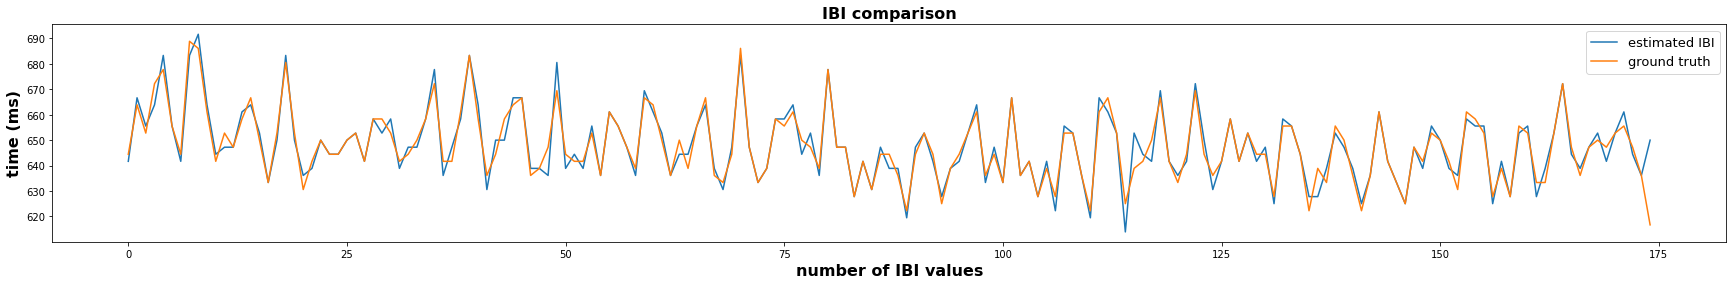

In [117]:
time = np.arange(0, 113777.778, 0002.777777778)
time_at_peak = time[peaks]
IBI_ = np.zeros(len(time_at_peak)-1)
for i in range(1, len(time_at_peak)):
  IBI_[i-1] = time_at_peak[i] - time_at_peak[i-1]


plt.figure(figsize=(30,4))
plt.plot(IBI_, label="estimated IBI")
plt.plot(IBI, label="ground truth")
plt.xlabel('number of IBI values', fontsize=16, fontweight='bold')
plt.ylabel('time (ms)', fontsize=16, fontweight='bold')
plt.title("IBI comparison", fontsize=16, fontweight='bold')
legend_properties = {'weight':'bold'}
plt.legend(prop={'size': 13})

Calculate RMSE

In [118]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(IBI, IBI_))
rmse

4.493773862864534